# Code to transmit the Data to the FPGA

In [1]:
import serial
import struct
from time import sleep

# Setup serial port
ComPort = serial.Serial('COM12', baudrate=9600, bytesize=8, parity='N', stopbits=1)
ComPort.flushOutput()
ComPort.flushInput()

# Read pixel values
with open(r'C:\Users\borat\OneDrive\Desktop\Quiz\Image.txt' , "r") as f:
    
    lines = f.readlines()

assert len(lines) == 128 * 128, "Image.txt does not contain 16384 pixels!"

# Transmit to FPGA
for i, line in enumerate(lines):
    binary_string = line.strip().zfill(8)       # Pad to 8 bits
    pixel = int(binary_string, 2)
    ComPort.write(struct.pack('B', pixel))
    print(i,f"{pixel}")
    sleep(0.001)  # Safe timing

print("✅ Completed transmission to FPGA.")


0 158
1 157
2 157
3 158
4 158
5 158
6 159
7 159
8 162
9 160
10 162
11 163
12 162
13 163
14 163
15 164
16 165
17 164
18 166
19 166
20 164
21 168
22 169
23 169
24 168
25 170
26 169
27 170
28 169
29 170
30 170
31 172
32 172
33 174
34 176
35 179
36 178
37 180
38 180
39 179
40 180
41 180
42 181
43 182
44 183
45 182
46 181
47 183
48 183
49 181
50 182
51 184
52 186
53 185
54 184
55 185
56 183
57 183
58 185
59 186
60 185
61 185
62 185
63 186
64 183
65 183
66 184
67 182
68 182
69 183
70 184
71 182
72 182
73 182
74 180
75 179
76 180
77 179
78 180
79 179
80 178
81 178
82 176
83 177
84 176
85 175
86 173
87 174
88 175
89 172
90 170
91 170
92 169
93 169
94 169
95 168
96 168
97 167
98 167
99 166
100 168
101 168
102 167
103 168
104 167
105 166
106 165
107 162
108 163
109 160
110 162
111 161
112 161
113 160
114 158
115 156
116 156
117 157
118 157
119 155
120 155
121 155
122 154
123 155
124 155
125 155
126 153
127 152
128 157
129 157
130 158
131 158
132 158
133 157
134 159
135 159
136 162
137 160
138 16

# Code to receive the Data from the FPGA

0:  157
1:  157
2:  158
3:  158
4:  158
5:  159
6:  159
7:  162
8:  160
9:  162
10:  163
11:  162
12:  163
13:  163
14:  164
15:  165
16:  164
17:  166
18:  166
19:  164
20:  168
21:  169
22:  169
23:  168
24:  170
25:  169
26:  170
27:  169
28:  170
29:  170
30:  172
31:  172
32:  174
33:  176
34:  179
35:  178
36:  180
37:  180
38:  179
39:  180
40:  180
41:  181
42:  182
43:  183
44:  182
45:  181
46:  183
47:  183
48:  181
49:  182
50:  184
51:  186
52:  185
53:  184
54:  185
55:  183
56:  183
57:  185
58:  186
59:  185
60:  185
61:  185
62:  186
63:  183
64:  183
65:  184
66:  182
67:  182
68:  183
69:  184
70:  182
71:  182
72:  182
73:  180
74:  179
75:  180
76:  179
77:  180
78:  179
79:  178
80:  178
81:  176
82:  177
83:  176
84:  175
85:  173
86:  174
87:  175
88:  172
89:  170
90:  170
91:  169
92:  169
93:  169
94:  168
95:  168
96:  167
97:  167
98:  166
99:  168
100:  168
101:  167
102:  168
103:  167
104:  166
105:  165
106:  162
107:  163
108:  160
109:  162
110:  161


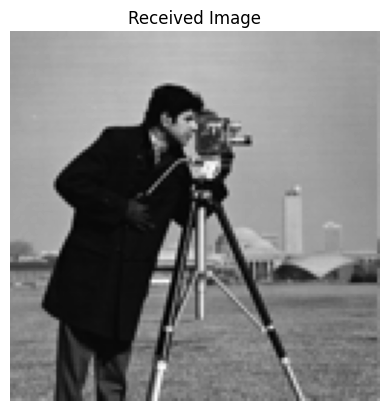

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import serial
import struct
from time import sleep

# === Setup serial port ===
ComPort = serial.Serial('COM12', baudrate=9600, bytesize=8, parity='N', stopbits=1)
ComPort.flushInput()
ComPort.flushOutput()

# === Image Receive Buffer ===
arr = []

# === Receive 16384 bytes (128x128) ===
for i in range(16384):
    byte = ComPort.read(size=1)
    pixel = int.from_bytes(byte, byteorder='little', signed=False)
    arr.append(pixel)
    print(f"{i}:  {pixel}")
    sleep(0.001)  # Prevent UART overflow

print("✅ Completed reception")
print("Total pixels received:", len(arr))

# === Save to file ===
with open("obtained_image.txt", 'w') as f:
    for idx, pixel in enumerate(arr):
        f.write(f"{pixel}\n")

# === Display image ===
if len(arr) == 128 * 128:
    img = np.array(arr, dtype=np.uint8).reshape((128, 128))
    plt.imshow(img, cmap='gray')
    plt.title("Received Image")
    plt.axis('off')
    plt.show()
else:
    print("⚠️ Error: Did not receive exactly 128x128 pixels.")


# Convert the img.txt to coe file

In [6]:
def txt_to_coe(txt_filename, coe_filename, radix=10):
    try:
        with open(txt_filename, 'r') as txt_file:
            lines = [line.strip() for line in txt_file if line.strip()]

        decimal_values = [str(int(line, 2)) for line in lines]  # Convert binary to decimal

        with open(coe_filename, 'w') as coe_file:
            coe_file.write(f"memory_initialization_radix={radix};\n")
            coe_file.write("memory_initialization_vector=\n")
            
            for i, value in enumerate(decimal_values):
                if i == len(decimal_values) - 1:
                    coe_file.write(f"{value};\n")  # End with semicolon
                else:
                    coe_file.write(f"{value},\n")
        
        print(f"Successfully converted {txt_filename} to {coe_filename}")
    except Exception as e:
        print(f"Error: {e}")


# Example usage
txt_to_coe(r'C:\Users\borat\OneDrive\Desktop\Quiz\Image.txt', r'C:\Users\borat\OneDrive\Desktop\Quiz\output.coe')

Successfully converted C:\Users\borat\OneDrive\Desktop\Quiz\Image.txt to C:\Users\borat\OneDrive\Desktop\Quiz\output.coe
